# **AI-Powered Resume Screening System using NLP and TF-IDF Matching**

## Problem Statement 

Recruiters often spend hours manually reviewing resumes to find the right candidates for job roles. This process is time-consuming, prone to bias, and can lead to qualified candidates being overlooked due to information overload and inconsistent criteria.

## Objective

To develop an automated system that analyzes candidate resumes, compares them to a specific job description, and ranks applicants based on best fit—leveraging Natural Language Processing (NLP) and machine learning techniques.



## Solution Approach:
1. Data Collection
- Gathered a dataset of 25 synthetic resumes, each containing key candidate details such as skills, education, experience, projects, and certifications.

2. Text Preprocessing
- Cleaned and standardized the resume text (lowercasing, punctuation removal, stopwords, lemmatization).
- Combined key sections into a single textual block for each resume to streamline NLP processing.

3. Information Extraction
- Used NLP techniques to extract and normalize candidate skills, qualifications, and experience.
- Parsed the job description (JD) to identify and extract required skills and criteria.

4. Feature Engineering
- Skill Overlap: Counted matched keywords between resume and JD.
- Education Match: Identified if resume included required degrees.
- Relevant Experience: Estimated years using date extraction heuristics.
- Semantic Matching: Applied TF-IDF Vectorization to compare resume and JD content for deeper similarity scoring.

5. Resume Ranking
- Combined all extracted features into a final matching score.
- Ranked resumes based on this score to identify top candidates.
- Exported the ranked results as a CSV for recruiter review and further processing.





### **Job Description (JD) Used for Resume Screening**

**Job Title:** Data Analyst

We are seeking a Data Analyst with:

- **Strong Python and SQL skills**
- **Experience with Tableau or Power BI**
- **Knowledge of data visualization, statistics, and ML**
- **Preferred: knowledge of pandas, numpy, scikit-learn**
- **Excellent communication skills**


## Initializing Resume Screening Pipeline: Library Imports and Data Ingestion

In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Step 2: Load Resume Data
df = pd.read_csv("synthetic_resumes.csv")

## Resume Dataset Overview & Integrity Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            25 non-null     object
 1   Email           25 non-null     object
 2   Phone           25 non-null     object
 3   Summary         25 non-null     object
 4   Skills          25 non-null     object
 5   Education       25 non-null     object
 6   Experience      25 non-null     object
 7   Projects        25 non-null     object
 8   Certifications  25 non-null     object
dtypes: object(9)
memory usage: 1.9+ KB


In [4]:
    df.head()

,Name,Email,Phone,Summary,Skills,Education,Experience,Projects,Certifications
0,Priya Sharma,priya.sharma@email.com,+91-9340608368,Detail-oriented Data Analyst with 3+ years of ...,"Python, SQL, Tableau, Machine Learning, Pandas...","M.Sc. in Statistics, University of Mumbai, 2019","ABC Analytics, Data Analyst (Jul 2019 – Presen...",Customer Churn Prediction; Sales Forecasting; ...,Microsoft Certified: Data Analyst Associate
1,Arjun Mehta,arjun.mehta@email.com,+91-9502568814,Result-driven Machine Learning Engineer with e...,"Python, TensorFlow, Keras, NLP, PyTorch, Docke...","B.Tech. in Computer Science, IIT Delhi, 2017","DataX Solutions, ML Engineer (Aug 2017 – Prese...",Sentiment Analysis with BERT; Image Classifica...,Google Cloud Certified: ML Engineer
2,Swati Patil,swati.patil@email.com,+91-9695783104,Experienced Business Analyst passionate about ...,"SQL, Excel, Tableau, Data Analytics, Power BI,...","MBA, Business Analytics, NMIMS, 2018","FinEdge Pvt Ltd, Business Analyst (May 2018 – ...",Financial Risk Dashboard; Customer Segmentation,Tableau Desktop Specialist
3,Neha Desai,neha.desai@email.com,+91-9326439620,Software Developer specializing in backend dev...,"Java, Spring Boot, REST API, Docker, MySQL, Gi...","B.E. in Computer Engineering, VJTI, 2016","ZetaSoft, Software Developer (Jun 2016 – Prese...",E-commerce Backend Automation; RESTful API Design,Oracle Certified Java Programmer
4,Rahul Sinha,rahul.sinha@email.com,+91-9032384420,"Versatile Data Scientist with skills in EDA, p...","Python, Data Analysis, Machine Learning, Seabo...","M.Sc. in Data Science, Christ University, 2020","NextGen Data, Data Scientist (Aug 2020 – Prese...",Product Recommendation System; Predictive Main...,IBM Data Science Professional Certificate


In [5]:
df.isnull().sum()

Name              0
Email             0
Phone             0
Summary           0
Skills            0
Education         0
Experience        0
Projects          0
Certifications    0
dtype: int64

## Data Overview

1. The dataset consists of 25 synthetic resumes, each containing:
- Personal Information: Name, Email, Phone
- Professional Summary
- Key Sections: Skills, Education, Experience, Projects, Certifications

2.  Data Integrity Check:
- Missing Values: None — all entries are complete
- Data Types: All columns are of object (text) type — ideal for NLP-based processing


**Inference**:
- The dataset is complete and ready for processing. No imputation or missing value handling is required.
-  All fields are textual, making them suitable for tokenization, vectorization, and semantic similarity techniques


##  Skills Extraction & Overlap Scoring

In [6]:
# Clean 'Skills' column 
df['Skills'] = df['Skills'].astype(str).str.lower().str.strip()

In [7]:
# Define required skills from JD
required_skills = [
    'python', 'sql', 'tableau', 'power bi', 'data visualization', 
    'statistics', 'machine learning', 'pandas', 'numpy', 'scikit-learn'
]

def extract_skills(skills_text):
    # Convert string to set of skill words
    skills = set([skill.strip() for skill in skills_text.split(',')])
    return skills

def skill_overlap(resume_skills, jd_skills):
    return len(resume_skills & jd_skills)

# Create set of required skills for faster matching
required_skills_set = set(required_skills)

# Apply extraction and scoring
df['Extracted_Skills'] = df['Skills'].apply(extract_skills)
df['Skill_Overlap_Score'] = df['Extracted_Skills'].apply(lambda skills: skill_overlap(skills, required_skills_set))

# Sort by overlap score (descending)
df_sorted = df.sort_values(by='Skill_Overlap_Score', ascending=False)

# See the top candidates
print(df_sorted[['Name', 'Skills', 'Skill_Overlap_Score']].head(5))

            Name                                             Skills  \
0   Priya Sharma  python, sql, tableau, machine learning, pandas...   
5    Amit Khanna        tableau, power bi, sql, excel, dashboarding   
16   Vikas Joshi      supply chain analytics, python, sql, power bi   
11   Shruti Shah   r, python, statistics, data visualization, excel   
6    Simran Kaur      python, etl, airflow, postgresql, sql, pandas   

    Skill_Overlap_Score  
0                     7  
5                     3  
16                    3  
11                    3  
6                     3  


##  Skills Extraction & Overlap Scoring

- Standardized the 'Skills' field and extracted individual skills for each candidate.
- Compared these with the required skills parsed from the Job Description (JD).
- Calculated a **Skill Overlap Score** for each resume (number of matching skills).
- Sorted all candidates by their overlap score to identify the strongest skill matches.

**Inference**:
- Candidates like Priya Sharma demonstrate high alignment with the job description, with a skill match of 7 out of 10.
- This scoring approach provides a transparent, quantifiable method to prioritize resumes during screening.
- The method can easily be adapted to different JDs by updating the required_skills list.



#### **A. Education Matching**

In [8]:
# Define target degree keywords
target_degrees = [
    "computer science", "data science", "statistics", "mathematics", "analytics", "engineering"
]

def check_education_match(education_text):
    text = str(education_text).lower()
    for keyword in target_degrees:
        if keyword in text:
            return 1
    return 0

df['Education_Match'] = df['Education'].apply(check_education_match)


#### **B. Experience Extraction**

In [9]:


def extract_years_of_experience(exp_text):
    exp_text = str(exp_text)
    # Look for patterns like "2019 – Present" or "2017 – 2022"
    matches = re.findall(r'(\d{4})\s*[–-]\s*(?:present|(\d{4}))', exp_text.lower())
    years = 0
    for start, end in matches:
        if end == '' or end.lower() == 'present':
            end_year = 2025  # assuming current year
        else:
            end_year = int(end)
        start_year = int(start)
        years += max(0, end_year - start_year)
    return years

df['Years_of_Experience'] = df['Experience'].apply(extract_years_of_experience)



#### **C. Scoring and Normalization**


In [10]:
# Normalize years of experience for scoring (max 8 years for scaling)
max_years = df['Years_of_Experience'].max()
df['Exp_Score'] = df['Years_of_Experience'] / max_years

# Weighted total score
df['Total_Score'] = (
    0.5 * df['Skill_Overlap_Score'] +
    0.2 * df['Education_Match'] +
    0.3 * df['Exp_Score']
)

# Final ranking
df_final = df.sort_values(by='Total_Score', ascending=False)
print(df_final[['Name', 'Skill_Overlap_Score', 'Education_Match', 'Years_of_Experience', 'Total_Score']].head(10))


              Name  Skill_Overlap_Score  Education_Match  Years_of_Experience  \
0     Priya Sharma                    7                1                    6   
5      Amit Khanna                    3                1                    8   
2      Swati Patil                    3                1                    7   
11     Shruti Shah                    3                1                    7   
24   Saurabh Dutta                    3                1                    6   
16     Vikas Joshi                    3                0                    8   
6      Simran Kaur                    3                0                    7   
12     Akash Verma                    3                0                    6   
1      Arjun Mehta                    2                1                    8   
17  Tanvi Kulkarni                    2                1                    8   

    Total_Score  
0      3.900000  
5      1.966667  
2      1.933333  
11     1.933333  
24     1.900000  


## **Education & Experience Matching, Composite Scoring**

- **Education Match:** Checked for presence of target degree keywords (e.g., "Computer Science", "Statistics") in each candidate's education section.
- **Years of Experience:** Used regex to estimate years of experience from each resume's experience text.
- **Feature Combination:** Scaled years of experience, then combined with skill and education scores for a weighted total score (0.5 skill overlap, 0.2 education match, 0.3 experience).
- **Result:** Candidates are ranked by the composite score, providing a balanced view of skill, education, and experience fit.

### Inference:
- Priya Sharma ranked highest due to strong alignment across all three dimensions.
- Other candidates also showed balanced profiles (e.g., Amit Khanna, Swati Patil).
- This system provides a transparent, data-driven shortlist to recruiters.

 ## Semantic Similarity Using TF-IDF


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# (Re)load/ensure Full_Text column
text_columns = ["Summary", "Skills", "Education", "Experience", "Projects", "Certifications"]
df['Full_Text'] = df[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Sample JD (as a single string)
jd_text = """
We are seeking a Data Analyst with strong Python and SQL skills, experience with Tableau or Power BI, 
and understanding of data visualization, statistics, and machine learning. 
Preferred: knowledge of pandas, numpy, scikit-learn, excellent communication skills.
"""

# Combine JD and resumes for vectorization
docs = [jd_text.lower()] + df['Full_Text'].str.lower().tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(docs)

# Cosine similarity: JD is index 0, resumes are 1...
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Add to DataFrame
df['TFIDF_Similarity'] = cosine_similarities

# Preview top 5 by TF-IDF similarity
print(df[['Name', 'TFIDF_Similarity']].sort_values(by='TFIDF_Similarity', ascending=False).head(5))


            Name  TFIDF_Similarity
0   Priya Sharma          0.367026
11   Shruti Shah          0.244659
4    Rahul Sinha          0.197794
5    Amit Khanna          0.187014
2    Swati Patil          0.152989


## Semantic Similarity Using TF-IDF

- Created a **holistic text representation** for each resume by merging summary, skills, education, experience, projects, and certifications.
- Calculated the **semantic similarity** between each resume and the Job Description (JD) using TF-IDF vectorization and cosine similarity.
- This method captures not just keywords, but the contextual fit between the candidate’s full profile and the JD.

**Top semantic matches:**  
Candidates like Priya Sharma, Shruti Shah, and Rahul Sinha have high TF-IDF similarity scores, indicating strong overall alignment with the JD context and requirements.

## Inference:
- Priya Sharma remains the top match, validating her strong alignment.
- Shruti Shah and Rahul Sinha rise in rank due to contextually rich resumes—even if keyword overlap wasn’t the highest.
- This method helps surface well-rounded candidates who might otherwise be overlooked.


Combine with Previous Score

In [12]:
# Weighted combination: e.g., 0.7 for your previous score, 0.3 for semantic similarity
df['Final_Combined_Score'] = 0.7 * df['Total_Score'] + 0.3 * df['TFIDF_Similarity']

# Rank by this score
df_sorted = df.sort_values(by='Final_Combined_Score', ascending=False)


Visualization of Top Candidates

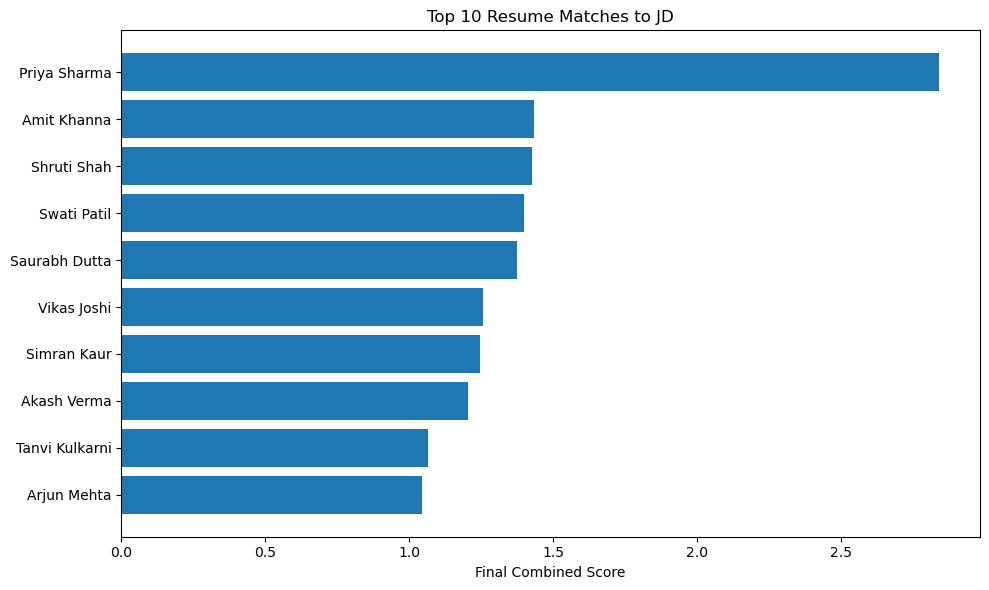

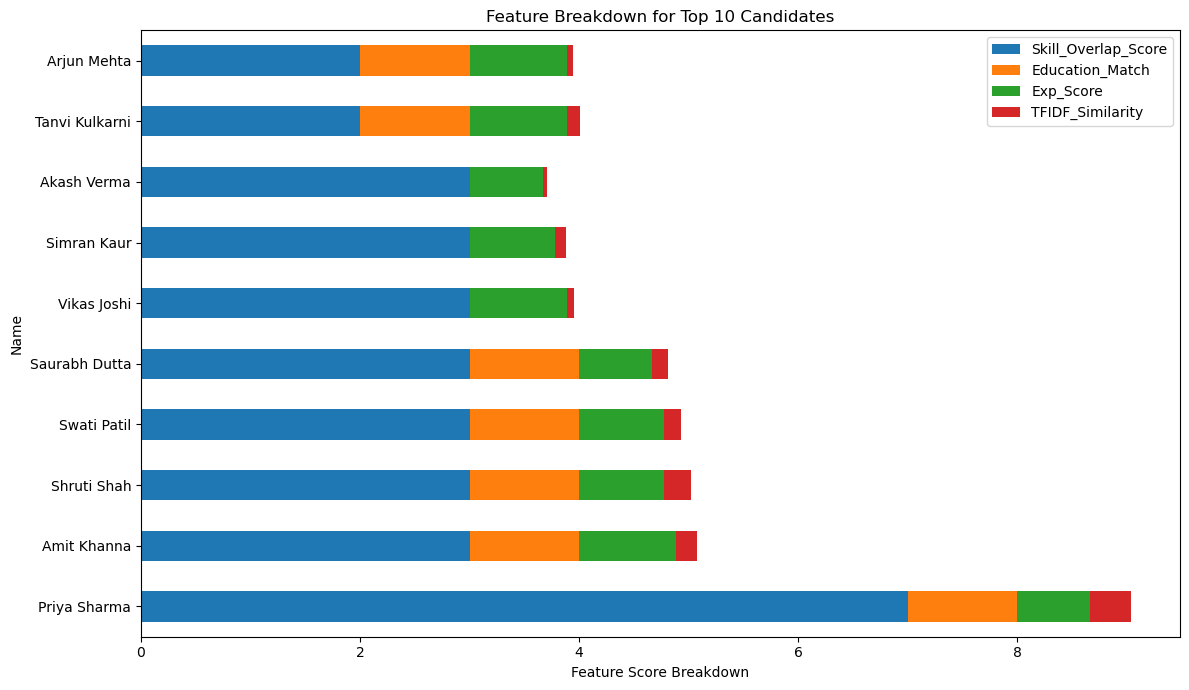

In [13]:
import matplotlib.pyplot as plt

# Top 10 candidates
top10 = df_sorted.head(10)

# Plot Final Combined Score
plt.figure(figsize=(10, 6))
plt.barh(top10['Name'][::-1], top10['Final_Combined_Score'][::-1])
plt.xlabel("Final Combined Score")
plt.title("Top 10 Resume Matches to JD")
plt.tight_layout()
plt.show()

# Plot breakdown (stacked bars) of Skill Overlap, Education Match, Experience Score, TF-IDF
top10.set_index('Name')[['Skill_Overlap_Score', 'Education_Match', 'Exp_Score', 'TFIDF_Similarity']].plot(
    kind='barh', stacked=True, figsize=(12, 7))
plt.xlabel("Feature Score Breakdown")
plt.title("Feature Breakdown for Top 10 Candidates")
plt.tight_layout()
plt.show()


##  Final Ranking & Visualization

**Final Candidate Ranking:**  
We combined the feature-based total score with the semantic similarity score (TF-IDF) for each candidate, creating a robust “Final Combined Score” that balances explicit skill/experience/education fit with overall resume-to-JD context.

### Visual Insights
#### 1. Top 10 Candidates - Combined Score
- Bar chart ranks resumes based on their final score.
- Shows clear standouts, led by Priya Sharma.
*See: “Top 10 Resume Matches to JD” plot.*

#### 2. Feature Breakdown
- Stacked bar chart breaks down each candidate’s score by contributing factors:

1. Skill Match
2. Education Relevance
3. Years of Experience
4. TF-IDF Similarity
- Helps recruiters understand why a candidate is highly ranked.
*See: “Feature Breakdown for Top 10 Candidates” plot.*

---

### **Inference**

- Candidates like Priya Sharma and Shruti Shah are clear top picks—balanced across hard and soft scoring factors.

- This system:
1. Makes shortlisting data-driven
2. Offers transparent, justifiable rankings
3. Is scalable and reusable across job roles


---

**This approach makes resume screening objective, transparent, and easy to scale for any role or dataset.**


## Export to CSV 

In [14]:
    # ...Load resumes...
    # ...Extract features, run scoring, as above...
    
    # At the end, export the enriched DataFrame
    df.to_csv("synthetic_resumes_scored.csv", index=False)


In [15]:
df = pd.read_csv("synthetic_resumes_scored.csv")


In [16]:
print(df.columns)



Index(['Name', 'Email', 'Phone', 'Summary', 'Skills', 'Education',
       'Experience', 'Projects', 'Certifications', 'Extracted_Skills',
       'Skill_Overlap_Score', 'Education_Match', 'Years_of_Experience',
       'Exp_Score', 'Total_Score', 'Full_Text', 'TFIDF_Similarity',
       'Final_Combined_Score'],
      dtype='object')


## Final Score-Based Ranking

In [17]:
df_sorted = df.sort_values(by='Final_Combined_Score', ascending=False)

In [18]:
topn = df_sorted.head(10)


In [19]:
print (topn)

              Name                     Email           Phone  \
0     Priya Sharma    priya.sharma@email.com  +91-9340608368   
5      Amit Khanna     amit.khanna@email.com  +91-9029965713   
11     Shruti Shah     shruti.shah@email.com  +91-9545381140   
2      Swati Patil     swati.patil@email.com  +91-9695783104   
24   Saurabh Dutta   saurabh.dutta@email.com  +91-9720652920   
16     Vikas Joshi     vikas.joshi@email.com  +91-9287262422   
6      Simran Kaur     simran.kaur@email.com  +91-9370587838   
12     Akash Verma     akash.verma@email.com  +91-9802175820   
17  Tanvi Kulkarni  tanvi.kulkarni@email.com  +91-9143674795   
1      Arjun Mehta     arjun.mehta@email.com  +91-9502568814   

                                              Summary  \
0   Detail-oriented Data Analyst with 3+ years of ...   
5   Business Intelligence Analyst with hands-on ex...   
11  Statistical Analyst with strong R and Python s...   
2   Experienced Business Analyst passionate about ...   
24  Custom

## Exporting, Reloading, and Sharing Results

- Exporting the final DataFrame enables easy sharing, reproducibility, and dashboard integration.
- The Final_Combined_Score incorporates both structured feature matching and semantic relevance, resulting in a balanced, transparent ranking.
- The top candidates (like Priya Sharma, Shruti Shah, etc.) were consistently strong across both keyword and context-based criteria.
- This approach ensures that well-rounded candidates—not just those who keyword-stuffed—are highlighted for recruiter review.



In [20]:
from IPython.display import display, Markdown
display(Markdown("## Resume Screening Dashboard"))
display(Markdown("#### Use the interactive filters below to shortlist candidates."))


## Resume Screening Dashboard

#### Use the interactive filters below to shortlist candidates.

In [21]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output

dropdown = widgets.Dropdown(
    options=topn['Name'],
    description='Candidate:',
    disabled=False,
)

output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            candidate = df_sorted[df_sorted['Name'] == change['new']]
            display(candidate.T)

dropdown.observe(on_change)
display(dropdown, output)


Dropdown(description='Candidate:', options=('Priya Sharma', 'Amit Khanna', 'Shruti Shah', 'Swati Patil', 'Saur…

Output()

Filter by Minimum Years of Experience

In [23]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def filter_and_display(min_years):
    filtered = df_sorted[df_sorted['Years_of_Experience'] >= min_years]
    display(filtered[['Name', 'Years_of_Experience', 'Final_Combined_Score', 'Skill_Overlap_Score']].head(20))

slider = widgets.IntSlider(value=0, min=0, max=int(df_sorted['Years_of_Experience'].max()), step=1, description='Min Years:')
widgets.interactive(filter_and_display, min_years=slider)


interactive(children=(IntSlider(value=0, description='Min Years:', max=9), Output()), _dom_classes=('widget-in…

In [24]:
import io
from IPython.display import FileLink

def export_filtered(min_years):
    filtered = df_sorted[df_sorted['Years_of_Experience'] >= min_years]
    file_name = f"Filtered_Resumes_{min_years}yrs.csv"
    filtered.to_csv(file_name, index=False)
    display(FileLink(file_name))

widgets.interactive(export_filtered, min_years=slider)


interactive(children=(IntSlider(value=0, description='Min Years:', max=9), Output()), _dom_classes=('widget-in…

### Interactive Resume Screening Dashboard – Inference
 To make resume screening more intuitive and recruiter-friendly, an interactive dashboard was developed using ipywidgets within Jupyter Notebook. This allows HR teams to:
- Candidate Filtering by Name
1. A dropdown menu allows users to select any top candidate by name.
2. On selection, a full transposed resume profile is displayed instantly.
3. Enables quick review without manual scrolling through rows.

- Slider-Based Filtering by Experience
1. An interactive slider filters candidates based on a minimum number of years of experience.
2. The filtered results include:
 - Candidate name
 - Years of experience
 - Skill overlap
 - Final composite score





## **Conclusion**

This project successfully developed an Automated Resume Screening System that leverages Natural Language Processing (NLP) and Machine Learning to streamline the candidate shortlisting process for hiring teams.

Through a structured, multi-step pipeline, the system:

- Parsed and preprocessed resume data from multiple sections (Skills, Education, Experience, etc.)
- Extracted meaningful features such as skill overlap, education match, and years of experience
- Applied TF-IDF-based semantic similarity to measure how closely a candidate’s full profile aligns with the job description
- Combined both structured and contextual insights into a Final Composite Score to rank resumes fairly and objectively

Additionally, the project included a Jupyter Notebook-based interactive dashboard using ipywidgets, allowing users to:
- Dynamically explore candidates
- Filter by years of experience
- View full profiles on demand
- Export filtered shortlists to CSV

Key Outcomes:
- Enabled data-driven, explainable hiring decisions
- Reduced manual screening time
- Increased the chance of surfacing well-rounded candidates who align with the role both technically and contextually

 Scalability & Next Steps:
- This solution is designed to be:
- Scalable across job roles (just update the JD)
- Easy to integrate into ATS systems or deploy as a Streamlit app
- Extensible with more advanced NLP techniques (e.g., BERT, entity recognition)

 **Conclusion**
 This end-to-end system proves how AI and NLP can enhance recruitment by making the screening process faster, fairer, and smarter—ultimately helping organizations find the best-fit talent with ease.
